# Import Library

In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [2]:
def save_model(model):
    pickle.dump(model, open("./assets/model.pkl", "wb"))


def load_model():
    return pickle.load(open("./assets/model.pkl", "rb"))

# Create Directory if Not Exist

In [3]:
import os

if not os.path.exists('assets'):
   os.makedirs('assets')

# Adult Census Income Dataset

In [4]:
# Encode dataset column to number base
def cleandata(dataset):
    dataset.drop("fnlwgt", axis = 1, inplace = True)
    for column in dataset.columns:
        MODE = dataset[column].mode()[0]
        dataset[column].fillna(MODE, inplace = True)
    for column in dataset.columns:
        if isinstance(dataset[column].dtype, object):
            LE = LabelEncoder()
            dataset[column] = LE.fit_transform(dataset[column])
    return dataset


# Split income and all others for features
def split_feature_class(dataset, feature):
    features = dataset.drop(feature, axis=1)
    labels = dataset[feature].copy()
    return features, labels

In [2]:
# https://www.kaggle.com/uciml/adult-census-income
dataset = pd.read_csv("./assets/adult.csv")
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
dataset.describe().round(2)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,38.58,189778.37,10.08,1077.65,87.30,40.44
std,13.64,105549.98,2.57,7385.29,402.96,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117827.00,9.00,0.00,0.00,40.00
50%,37.00,178356.00,10.00,0.00,0.00,40.00
75%,48.00,237051.00,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


In [15]:
dataset.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [16]:
for column in dataset.columns:
    print(f"{column} = {dataset[dataset[column] == '?'].shape[0]}")

age = 0
workclass = 1836
fnlwgt = 0
education = 0
education.num = 0
marital.status = 0
occupation = 1843
relationship = 0
race = 0
sex = 0
capital.gain = 0
capital.loss = 0
hours.per.week = 0
native.country = 583
income = 0


# Visualization

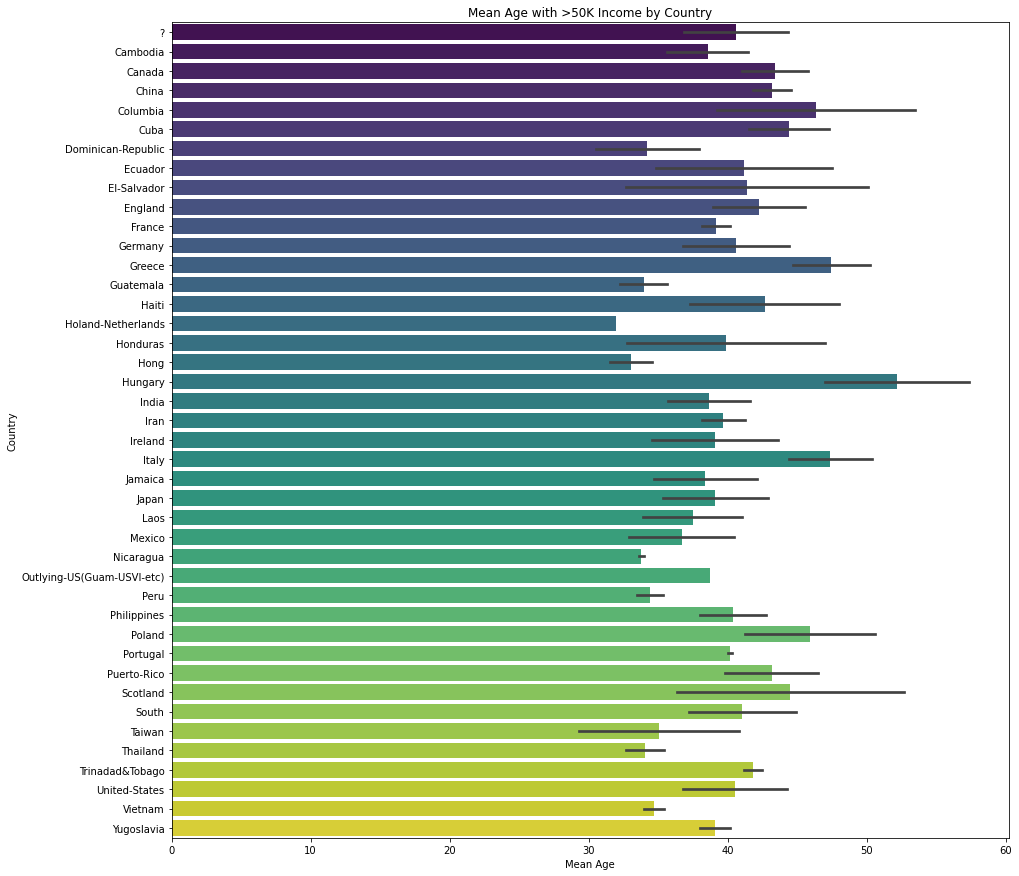

In [ ]:
# average age and native country
rich = dataset[dataset["income"] == '>50K']
poor = dataset[dataset["income"] == '<=50K']

country_age_data = dataset[["native.country", "income", "age"]].groupby(["native.country", "income"]).mean()
country_age_data = country_age_data.reset_index()

plt.figure(figsize=(15, 15))
sns.barplot(x="age", y="native.country", data=country_age_data, palette="viridis")
plt.title("Mean Age with >50K Income by Country")
plt.xlabel("Mean Age")
plt.ylabel("Country")
plt.show()

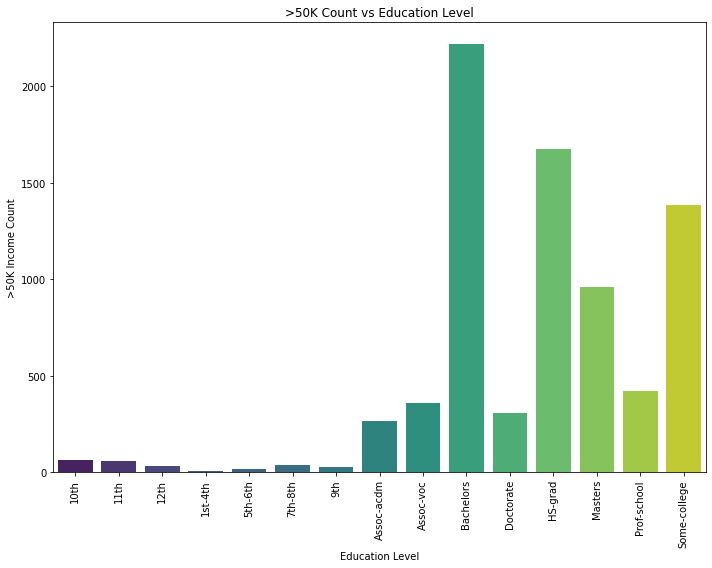

In [ ]:
# education level
education_data = rich.groupby("education")["income"].count()
education_data = education_data.reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x="education", y="income", data=education_data, palette="viridis")
plt.title(">50K Count vs Education Level")
plt.xlabel("Education Level")
plt.ylabel(">50K Income Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

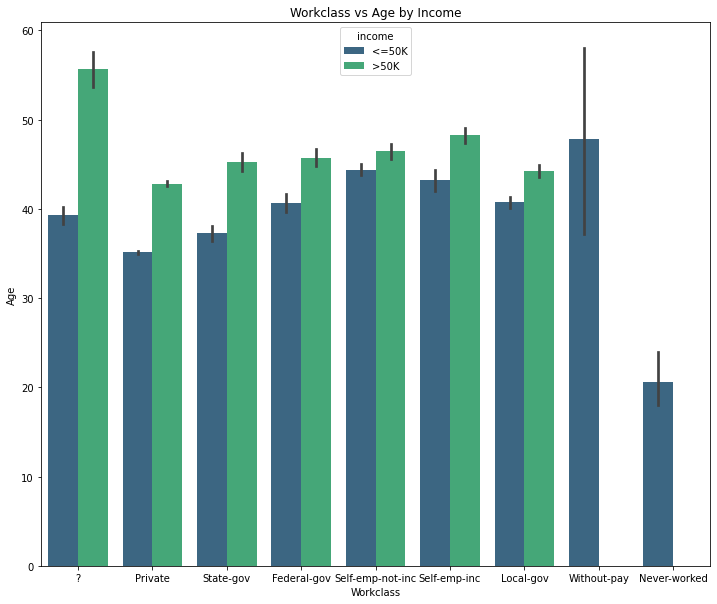

In [ ]:
# workclasses and age by income
plt.figure(figsize=(12, 10))
sns.barplot(x="workclass", y="age", hue="income", data=dataset, palette="viridis")
plt.title("Workclass vs Age by Income")
plt.xlabel("Workclass")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

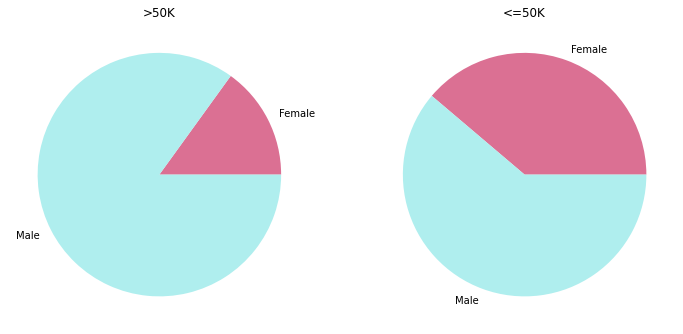

In [ ]:
# male and female
gender_rich = rich[["sex", "income"]].groupby(["sex"]).count()
gender_rich = gender_rich.reset_index()

gender_poor = poor[["sex","income"]].groupby(["sex"]).count()
gender_poor = gender_poor.reset_index()

plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.pie(x=gender_rich["income"], labels=["Female", "Male"], colors=["palevioletred", "paleturquoise"])
plt.title(">50K")

plt.subplot(1, 2, 2)
plt.pie(x=gender_poor["income"], labels=["Female", "Male"], colors=["palevioletred", "paleturquoise"])
plt.title("<=50K")
plt.show()

# Data Cleaning

In [9]:
dataset = cleandata(dataset)
dataset.sample(5)

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4704,10,4,15,9,2,12,0,4,1,0,0,49,39,0
20579,30,2,14,14,2,10,0,4,1,0,0,34,39,0
28175,17,4,15,9,2,7,0,4,1,0,0,44,39,1
3923,9,4,15,9,2,4,0,4,1,34,0,49,39,0
9003,10,4,3,1,4,8,3,3,1,0,0,34,6,0


# Gaussian Naive Bayes Model

In [6]:
# train 80 % and test 20 %
train_set, test_set = train_test_split(dataset, test_size=0.2)

# train and test
train_features, train_labels = split_feature_class(train_set, "income")
test_features, test_labels   = split_feature_class(test_set,  "income")

# model prediction accuracy
MODEL = GaussianNB()
MODEL.fit(train_features, train_labels)

clf_pred = MODEL.predict(test_features)
accuracy = accuracy_score(test_labels, clf_pred)
print(f"Accuracy = {accuracy * 100:.2f}%")

Accuracy = 82.40%


In [7]:
save_model(MODEL)